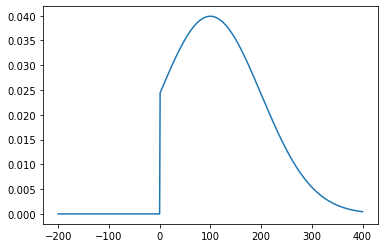

In [1]:
# トービットモデルについて
# 目的変数に左打ち切り or 右打ち切り or 両側打ち切りが発生する場合の線形モデル。打ち切り回帰モデルともいう

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

sigma, mu = 100, 100
threshold = 0
normdist = lambda x: 1/np.sqrt(2*np.pi*sigma)*np.exp(-1*((x-mu)**2)/(2*(sigma**2))) if x > 0 else 0
x = list(range(-200, 401))
y = list(map(normdist, x))

plt.plot(x, y)
plt.show() # 0以下の値を左打ち切りの例

   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8


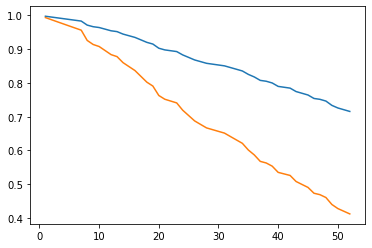

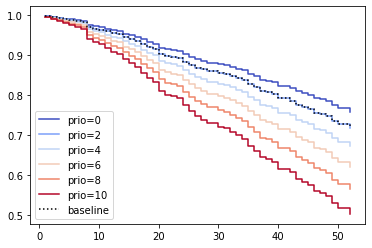

In [14]:
# 生存時間解析について
# 生物の死や機械システムの故障など、1つの事象が発生するまでの予想される期間を解析する分野
# S(x)=1−F(x)は、時刻xにまだ生きている確率を表すという意味で「生存関数」と呼ばれる
# 時刻xにおいて生存している者のうち、その後短時間に死亡する者の率を「ハザード関数」と呼ぶ。

# Cox比例ハザードモデルとは
# 時間が異なる郡間の比(ハザード比)が時間に限らず一定であることを「比例ハザード性」という
# この「比例ハザード性」を満たすハザードモデルのことをCox比例ハザードモデルという

import matplotlib.pyplot as plt

from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

# メリーランド州受刑者の追跡調査データを取得
rossi = load_rossi()

# Cox比例ハザードモデル生成
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

# 推測を実行
result = cph.predict_survival_function(rossi)

# プロット元のデータを表示
print(rossi.iloc[0:2])

# 結果をプロット
sample0 = result.iloc[:, 0] # 過去の受刑回数3回の生存確率
sample1 = result.iloc[:, 1] # 過去の受刑回数8回の生存確率
plt.plot(sample0.index, sample0)
plt.plot(sample1.index, sample1)
plt.show() # 2倍程度の開きがあることを確認

# 共変量の可視化
cph.fit(rossi, duration_col='week', event_col='arrest')
cph.plot_partial_effects_on_outcome(
    covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm'
)  # 過去の受刑回数の値が大きいほど生存確率は下にくる
plt.show()

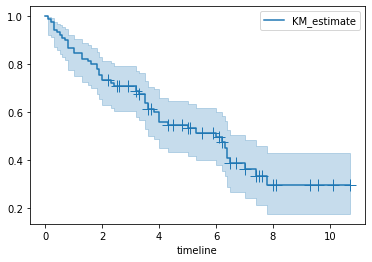

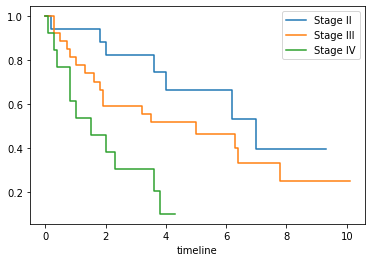

In [22]:
# カプラン・マイヤー推定量
# 観察対象のイベント発生時刻を小さい順に並べて、t(1)、t(2)、…、t(r)と置くときに、
# 時刻t(i)≦t<t(i+1)の時までにまだイベントが起きていない確率を「カプラン・マイヤー推定量」という

import matplotlib.pyplot as plt

from lifelines import datasets
from lifelines import KaplanMeierFitter

# 喉頭癌のステージ別・年齢別の生存期間データを取得
larynx_data = datasets.load_larynx()

# カプラン・マイヤーモデルを生成
kmf = KaplanMeierFitter()
kmf.fit(durations=larynx_data.time, event_observed=larynx_data.death)

# 生存曲線(カプラン・マイヤー曲線)を描画
kmf.plot(show_censors=True)
plt.show()

# ステージ毎の生存曲線を描画
larynx_data_stage2 = larynx_data.query('Stage_II == 1')
larynx_data_stage3 = larynx_data.query('Stage_III == 1')
larynx_data_stage4 = larynx_data.query('Stage_IV == 1')

kmf2 = KaplanMeierFitter()
kmf2.fit(durations=larynx_data_stage2.time, event_observed=larynx_data_stage2.death, label='Stage II')
kmf2.plot(ci_show=False)
kmf3 = KaplanMeierFitter()
kmf3.fit(durations=larynx_data_stage3.time, event_observed=larynx_data_stage3.death, label='Stage III')
kmf3.plot(ci_show=False)
kmf4 = KaplanMeierFitter()
kmf4.fit(durations=larynx_data_stage4.time, event_observed=larynx_data_stage4.death, label='Stage IV')
kmf4.plot(ci_show=False)

plt.show() # ステージが高いほど生存曲線が低い